# REL 560 Final Project Notebook
### Sentiment Analysis on Seventh-day Adventist Periodicals

Welcome to my final project for REL 560 - Text Analysis with Dr. Jeri Wieringa! This final Jupyter Notebook consolidates the semester's worth of work in a readable, accessible, and singular notebook for reference and easy sharing of the project. 

At the beginning of the semester, I started with a collection of 783 issues from Seventh-day Adventist periodicals that centered topics of religious liberty. The three titles were *The American Sentinel* with 636 issues and abbreviated as AmSn, *The Sentinel of Christian Liberty* with 86 issues and abbreviated as SOL, and *Liberty: A Magazine of Religious Freedom* with 61 issues and abbreviated as LibM. It is important to note that SOL became LibM in 1906, but for the purposes of this project they were treated as separate titles. 

To begin, PDF scans of the periodicals were obtained from Dr. Jeri Wieringa. Part of Dr. Wieringa's larger dissertation project on Seventh-day Adventist documents, she obtained the documents digitally from the Office of Archives, Statistics, and Research for the Seventh-day Adventist General Conference. With the documents, metadata was created from each title that included information like the file name, publication date, issue and volume number, editorial team, and place of publication. The metadata files can be found here: https://drive.google.com/drive/folders/1EGga_c7cY4RkqfFIo4azJtJ7IvTs7QpH?usp=sharing

Once the metadata was created, the PDFs of each issue were turned into text files. To make the text files easier to work with later in the process, each page of the issue was saved as its own text file resulting in 11,472 files. 

Using the text files, topic modeling was done in order to determine what sorts of topics were being discussed across the collection. By nature of how topic modeling works, each time the model is run it produces a different set of topics. The model used in this project was created on April 18, 2022 and run with 10 topics. The topics are listed below:

Topic 0

['sunday', 'law', 'court', 'day', 'city', 'case', 'closing', 'work', 'said', 'one', 'business', 'open', 'fair', 'county', 'ing', 'would', 'upon', 'made', 'police', 'two']

Topic 1

['day', 'sunday', 'sabbath', 'law', 'rest', 'seventh', 'laws', 'religious', 'week', 'work', 'one', 'observance', 'would', 'first', 'man', 'days', 'labor', 'people', 'lord', 'upon']

Topic 2

['people', 'one', 'great', 'would', 'war', 'american', 'men', 'time', 'country', 'world', 'said', 'many', 'man', 'may', 'day', 'new', 'upon', 'peace', 'years', 'well']

Topic 3

['church', 'state', 'christian', 'would', 'national', 'public', 'american', 'union', 'religious', 'religion', 'one', 'schools', 'people', 'reform', 'upon', 'states', 'country', 'united', 'political', 'may']

Topic 4

['church', 'catholic', 'roman', 'rome', 'pope', 'protestant', 'papacy', 'catholics', 'protestants', 'papal', 'bishop', 'new', 'cardinal', 'authority', 'history', 'protestantism', 'power', 'first', 'faith', 'england']

Topic 5

['state', 'law', 'religious', 'government', 'right', 'religion', 'civil', 'rights', 'liberty', 'upon', 'man', 'men', 'people', 'one', 'may', 'power', 'would', 'laws', 'every', 'god']

Topic 6

['god', 'christ', 'power', 'man', 'world', 'men', 'lord', 'shall', 'jesus', 'one', 'earth', 'christian', 'would', 'love', 'word', 'upon', 'unto', 'things', 'spirit', 'said']

Topic 7

['bill', 'congress', 'religious', 'liberty', 'states', 'society', 'washington', 'united', 'association', 'district', 'legislation', 'senate', 'secretary', 'new', 'committee', 'house', 'office', 'shall', 'tract', 'columbia']

Topic 8

['sentinel', 'new', 'one', 'york', 'bible', 'american', 'year', 'address', 'copy', 'liberty', 'post', 'sent', 'per', 'press', 'publishing', 'copies', 'bond', 'paper', 'ordered', 'pacific']

Topic 9

['price', 'new', 'cents', 'pages', 'book', 'pacific', 'york', 'press', 'cloth', 'address', 'bond', 'cal', 'publishing', 'one', 'city', 'oakland', 'health', 'work', 'street', 'every']

This project concerns Topic 4, a topic that seems to be related to words associated with the Roman Catholic Church. In order to do further analysis with the topic, the 10 documents (reminder that "document" here means text files of single pages from the issues) with the highest representation of the document were saved into a file as a list with the file name. Below, that file is being imported into this notebook so it can be worked with.

In [2]:
with open("../Data/Periodical-topic-model-output/top_doc_list.txt", "r") as f:
    pope_docs = f.read().split("\n")
pope_docs

['SOL19030212-V18-07-page-13',
 'SOL19021201-V17-13-page-1',
 'LibM19080701-V03-03-page-20',
 'SOL19001108-V15-44-page-11',
 'SOL19030122-V18-04-page-11',
 'AmSn19001108-V15-44-page-11',
 'LibM19100701-V05-03-page-33',
 'SOL19030108-V18-02-page-10',
 'SOL19021201-V17-13-page-5',
 'SOL19030122-V18-04-page-13',
 '']

And to move forward, I am importing the necessary libraries. Jeri said I don't have to explain this, but it felt weird without anything so here is the non-explanation explanation. 

In [3]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()
import pandas as pd
pd.options.display.max_colwidth = 400
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jacobbarrett/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now that all of the libraries are imported, we are ready for sentiment analysis! 

Each of the 10 documents with the highest representation of words in Topic 4 (pope_docs) were run through sentiment analysis to get an overview of the general emotion or tone in the document. Sentiment analysis measures each sentence in a text file and gives it a score somewhere between -1 and 1, with -1 being a negative emotion, 0 being a neutral attitude, and 1 being a positive attitude. That process is run below and the sentiment score for each sentence in the 10 documents is printed below. 

In [5]:
directory = "../Data/Periodical-text-files-single-pages/"

import os
# Make empty list
sentence_scores = []

for doc in pope_docs[:-1]:
    text = open(os.path.join(directory, f"{doc}.txt")).read()
    # Replace line breaks with spaces
    text = text.replace('\n', ' ')
   # Break text into sentences
    sentences = nltk.sent_tokenize(text)


    # Get each sentence and sentence number, which is what enumerate does
    for number, sentence in enumerate(sentences):
        # Use VADER to calculate sentiment
        scores = sentimentAnalyser.polarity_scores(sentence)
        # Make dictionary and append it to the previously empty list
        sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound'], 'doc_id': doc})
        
sentence_scores

[{'sentence': 'THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.',
  'sentence_number': 1,
  'sentiment_score': 0.2342,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'had arrived.',
  'sentence_number': 2,
  'sentiment_score': 0.0,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'They were sent by Gregory " to resign the pontificate in his name, and all right and title to that .',
  'sentence_number': 3,
  'sentiment_score': -0.34,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'dignity."',
  'sentence_number': 4,
  'sentiment_score': 0.4019,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'But they came not to the council: Pope Gregory XII.',
  'sentence_number': 5,
  'sentiment_score': 0.0,
  'doc_id': 'SOL19030212-V18-07-page-13'},
 {'sentence': 'would not recognize the legitimacy of a council convened by Pope John XXIII.',
  'sentence_number': 6,
  'sentiment_score': 0.0,
  'doc_id': 'S

Now that each sentence has been assigned a sentiment score, let's see the 10 sentences with the lowest sentiment scores. In other words, here are the 10 most negative sentences:

In [6]:
# Assign DataFrame to variable red_df
pope_docs_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
pope_docs_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score,doc_id
208,"They were both men ""from whom profound devo-tional feeling could not but turn away abashed and confused. . . . Acts of most revolting cruelty to his own parti-sans showed Urban to be a type of that craft, treachery, and utter inhumanity which were hereafter to attaint the bad Italian popes.",17,-0.9351,SOL19021201-V17-13-page-5
157,""" On page 293, under the reign of Charles IX, we read ' that the Queen Mother en-tered into a conspiracy to remove him (Ad-miral Coligny) by assassination, and thus arouse the vengeance of the Huguenots, so that a pretext might be found for their destruction.'",13,-0.9001,LibM19100701-V05-03-page-33
156,"Boni-face in vain issued bull after bull, all of which were treated with contempt and de-fiance by Philip, who, after the death of Boniface, succeeded in placing the Arch-bishop of Bordeaux, under the title of Clement V, on the papal throne, and trans-ferred the seat of the Papacy from Rome to Avignon, where it remained for about 7o years.'",12,-0.8271,LibM19100701-V05-03-page-33
46,"He arrived at Avignon Sep-tember 24; he was taken sick on that very day, and died December 19.",20,-0.8000,SOL19021201-V17-13-page-1
98,"They charged him with insincerity, artifice, obstinacy, and contempt of his oaths.",11,-0.7906,SOL19030122-V18-04-page-11
220,"They were to publish before their own flocks the tri-umph of their enemies,- the complete in-dependence of their parishioners of their authority, their own condemnation for insufficiency, their disfranchisement from their ancient, immemorial rights. """,5,-0.7717,SOL19030122-V18-04-page-13
215,"Clement, on his side, fulmi-nated a terrible decree against his enemy,",24,-0.7650,SOL19021201-V17-13-page-5
238,"He by his general council published sen-tences of excommunication and anathema against the other two popes, declaring that "" the election of the one and the other was uncanonical and sacrilegious ; both were pronounced schismatics and her-etics ; their acts were all annulled, and all were forbidden, on pain of excommuni-cation, to obey the one or the other.""",23,-0.7269,SOL19030122-V18-04-page-13
97,"Benedict's cardinals charged him with being "" the author and maintainer of the schism,"" and as "" wicked as the Jews and the heathen soldiers who would rend the seamless robe of Christ.""",10,-0.6369,SOL19030122-V18-04-page-11
212,"THE PAPACY SPREADS ANARCHY AND DES-OLATION THROUGHOUT CHRISTENDOM As a natural consequence ""a bitter war then commenced between the two popes.",21,-0.6369,SOL19021201-V17-13-page-5


And here are the 10 most positive sentences:

In [7]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
pope_docs_df.sort_values(by='sentiment_score', ascending=False)[:10]

,sentence,sentence_number,sentiment_score,doc_id
25,"Ł The council next decreed that Gregory "" should retain the dignity of cardinal-bishop so long as he lived ; that he should be first in rank after the pope, unless some alteration should be judged expe-dient, with respect to this article, upon the resignation of Peter de Luna ; and that he should be perpetual legate of the Marches of Ancona, and enjoy undis-turbed all the honors, privileges, a...",26,0.9371,SOL19030212-V18-07-page-13
120,"His translation, fairly correct and dedicated to "" Our dear Lady of Lourdes,"" was received with the greatest approval by the highest Romish au-thorities, when, all of a sudden, on December 19,.",6,0.9169,AmSn19001108-V15-44-page-11
185,THE FRUITLESS EFFORT OF RULERS TO RESTORE ORDER TO THE PAPACY The miseries of this papal anarchy had now become so great that the king of France took the lead in having the great powers of Christendom unite to save the Papacy from itself.,22,0.9148,SOL19030108-V18-02-page-10
18,"Then the renunciation of Gregory was made by the proxy in the following words : I. Charles Malatesta, vicar of Rimini, gov-ernor of Romagna for our most holy father in Christ Lord Pope, Gregory XII., and general of the holy Roman Church, being authorized by the full power that has just now been read, and has been received by me from our said Lord Pope Gregory, compelled by no violence, but on...",19,0.9144,SOL19030212-V18-07-page-13
119,"Turning to the study of Holy Writ, he de-rived so much benefit from the reading of the Book of books, that he determined to share this blessing with his fellow-believers,-of whom hundreds, he said, who partook of the sacraments, had never opened a Bible.",5,0.8917,AmSn19001108-V15-44-page-11
63,"Turning to the study of Holy Writ, he de-rived so much benefit from the reading of the Book of books, that he determined to share this blessing with his fellow-believers, of whom hundreds, he said, who partook of the sacraments, had never opened a Bible.",5,0.8917,SOL19001108-V15-44-page-11
57,"But it was during the episcopate of Leo I, or "" Leo the Great,"" that the most important and decisive step was taken in exalting the bishop of Rome to the headship of the churches, and carrying out the purpose of that apostate church to dominate the whole world.",10,0.8830,LibM19080701-V03-03-page-20
178,"The Uni- versity of Paris received this word with joy, and sent to him an address, in which they recognized him as pope, and highly commended his noble sentiments.",15,0.8822,SOL19030108-V18-02-page-10
48,"From stereograph, copyright by Underwood and Underwood, New York City THE PAPAL CHAIR-BEARERS AND THE GORGEOUS CHAIR OF STATE IN WHICH THEY CARRY THE POPE TO ST. 18 LIBERTY emperor could dictate the polity and even the creed of the church, to the con-dition where the church was the sole authority in all things that concerned her and in many things that did not concern her.",1,0.8797,LibM19080701-V03-03-page-20
64,"His translation, fairly correct and dedicated to "" Our dear Lady of Lourdes,"" was received with the greatest approval by the highest Romish au-thorities, when, all of a sudden, on December 19, 1887, a decree of the "" Congregation of the Index "" appeared by which the book was unreservedly con-demned, its publication forbidden, and those in pos-session of copies ordered to surrender them to the ...",6,0.8779,SOL19001108-V15-44-page-11


Knowing the context of Seventh-day Adventism and their relationship to the Catholic Church, a surplus of negative sentences is not unexpected. We can see from the top 10 most positive sentences that there are some sentences with extremely positive sentiments, which is less expected. In order to do more analysis with the positive sentences and determine what sorts of things the periodicals are discussing with a positive tone in relation to the Catholic Church, the average sentiment score for each of the 10 documents (or, the 10 pages with the highest representation of Topic 4) was created.

In [8]:
pope_docs_total_df = pope_docs_df.groupby('doc_id')['sentiment_score'].mean()

final_pope_docs_df = pope_docs_total_df.sort_values(ascending=False)

final_pope_docs_df

doc_id
SOL19030212-V18-07-page-13     0.201504
SOL19021201-V17-13-page-1      0.149905
SOL19001108-V15-44-page-11     0.142659
LibM19080701-V03-03-page-20    0.139991
AmSn19001108-V15-44-page-11    0.095143
SOL19030108-V18-02-page-10     0.090200
SOL19021201-V17-13-page-5      0.066854
SOL19030122-V18-04-page-11     0.032122
SOL19030122-V18-04-page-13     0.000081
LibM19100701-V05-03-page-33   -0.109826
Name: sentiment_score, dtype: float64

We can see that the document with the highest sentiment score is the Sentinel of Christian Liberty Volume 18 Issue 07 page 13 and was published on February 12, 1903. The sentiment score is 0.201504, indicating a slightly more positive than neutral sentiment throughout the document. To analyze the text of this document and see why it has a more positive sentiment score, the text file was run through sentiment analysis and charted for easy visualization. 

In [9]:
final_pope_docs_sorted_df = pd.DataFrame({'doc_id':final_pope_docs_df.index, 'sentiment_score':final_pope_docs_df.values})

# Read in text file
text = open("../Data/Periodical-text-files-single-pages/SOL19030212-V18-07-page-13.txt").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

nltk.sent_tokenize(text)

['THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.',
 'had arrived.',
 'They were sent by Gregory " to resign the pontificate in his name, and all right and title to that .',
 'dignity."',
 'But they came not to the council: Pope Gregory XII.',
 'would not recognize the legitimacy of a council convened by Pope John XXIII.',
 'Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.',
 'They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.',
 'would recognize it as lawful council, but not otherwise.',
 'To this the emperor and the heads of the na-tions agreed.',
 "Accordingly, at the fourteenth session, July 4, 1415, one of Gregory's nuncios took the chair, and from Gregory read two bulls : the one convoking the Council of Constance, and, when thus convoked, owning it 

In [10]:
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)

0 THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.
1 had arrived.
2 They were sent by Gregory " to resign the pontificate in his name, and all right and title to that .
3 dignity."
4 But they came not to the council: Pope Gregory XII.
5 would not recognize the legitimacy of a council convened by Pope John XXIII.
6 Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.
7 They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.
8 would recognize it as lawful council, but not otherwise.
9 To this the emperor and the heads of the na-tions agreed.
10 Accordingly, at the fourteenth session, July 4, 1415, one of Gregory's nuncios took the chair, and from Gregory read two bulls : the one convoking the Council of Constance, and, when thus convoked, owning it as a lawful council

In [12]:
#Break text into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

pd.DataFrame(sentence_scores)

,sentence,sentence_number,sentiment_score
0,"THE SUPREMACY OF THE PAPACY 109 While the council had been disposing of John, ambassadors from Gregory XII.",1,0.2342
1,had arrived.,2,0.0000
2,"They were sent by Gregory "" to resign the pontificate in his name, and all right and title to that .",3,-0.3400
3,"dignity.""",4,0.4019
4,But they came not to the council: Pope Gregory XII.,5,0.0000
5,would not recognize the legitimacy of a council convened by Pope John XXIII.,6,0.0000
6,"Therefore, these messen-gers were commissioned to the emperor, and were empowered to treat with him.",7,0.4019
7,"They were directed to inform the em-peror that if he and the heads of the na-tions would allow the council to be con-voked anew by Pope Gregory XII., then Pope Gregory XII.",8,0.2263
8,"would recognize it as lawful council, but not otherwise.",9,0.0000
9,To this the emperor and the heads of the na-tions agreed.,10,0.2732


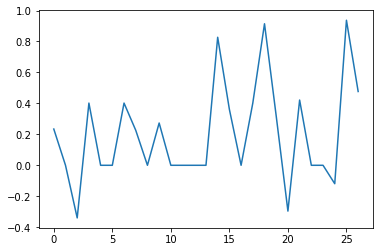

In [13]:
# Assign DataFrame to variable red_df
SOL19030212_V18_07_page_13_df = pd.DataFrame(sentence_scores)

SOL19030212_V18_07_page_13_df['sentiment_score'].plot();

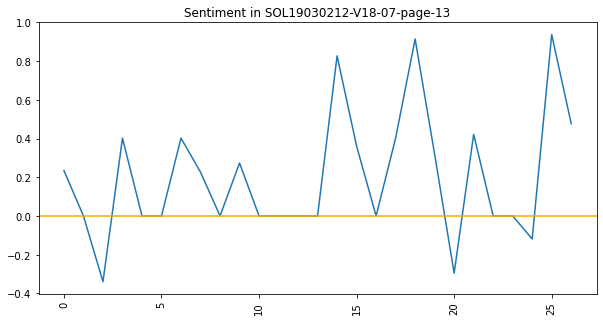

In [16]:
import matplotlib.pyplot as plt

ax = SOL19030212_V18_07_page_13_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in SOL19030212-V18-07-page-13')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

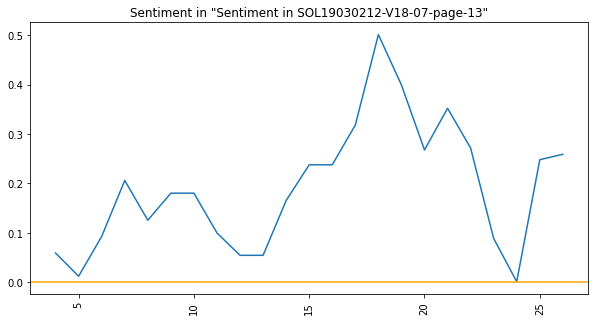

In [17]:
# Get averages for a rolling window, then plot
SOL19030212_V18_07_page_13_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Sentiment in SOL19030212-V18-07-page-13"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

Overall, the page looks overwhelmingly positive in sentiment. To get a better understanding of what is happening on the most positive page of the 10 pages with the highest representation of Topic 4 of the 11,472 pages, I went and read the page. I was curious to see if it is positive in an unexpected way (perhaps the page praises the Pope or the Catholic Church for something) and if so what was going on.

Upon reading the document, it appeared to be part of a larger piece that told a history of the Catholic Church. This specific page detailed a conflict between Pope Gregory XII and Pope John XXIII in the early 1400s. So, what does this tell us about the nature of the document and sentiment analysis?

Sentiment analysis can be useful, but can also be misleading. On first glance when the original sentiment scores were run, I could have concluded that the periodicals discuss the Catholic Church positively on some occasions. Even further, I could have presented the Sentinel of Christian Liberty Volume 18 Issue 07 page 13 as the example of the most positive document. We have ideas of what we mean by positive, but it was not until I looked at the content of the page specifically that the real reason it was being classified as positive by the sentiment analysis became clear. Descriptive words that were being used to present an overall neutral history of the conflict between the two popes like "empowered", "lawful", "dignity", and "peace" are recognized by the computer as positive words. 

## Concluding Thoughts ##

The processes of topic modeling and sentiment analysis are useful as they pointed to patterns that would have been impossible to see without using the computer due to the huge quantity of pages in the collection. Sentiment analysis does, however, fall short in this project because it is unable to decifer context of the words it has been told to flag as positive or negative. This project saw sentiment analysis interpret words being used in their original, descriptive context as positive, which is what it was asked to do. The process, though, falls short of the research question because the question relied on the assumption that the only emotions measured would be the intended emotions of the authors. Analysis like this can overlook things like context, sarcasm, and other rhetorical devices used by humans that are unreadable to the computer. All of this is to say that sentiment analysis has its value and place, but cannot be relied on alone to make conclusions about the tone and emotion of a text. While I may not have answered my question about if the Seventh-day Adventist periodicals are talking positively about the Catholic Church, I did get to learn about a conflict between two popes in the 1400s while developing computational skills that will be useful in my future reasearch. 